In [2]:
import matplotlib.pyplot as plt
import numpy as np
import jax
import jax.numpy as jnp

0.0018036054072090096


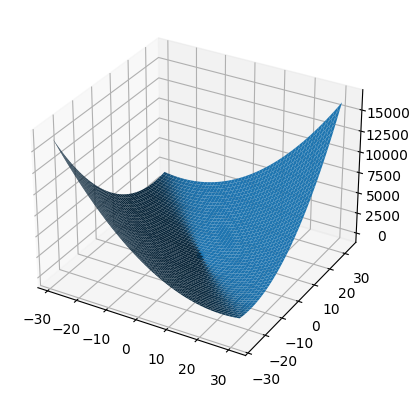

In [4]:
x = np.linspace(-29, 31, 1000)
y = np.linspace(-27, 33, 1000)

X, Y = np.meshgrid(x, y)

f = lambda x, y: (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2

Z = f(X, Y)

print(np.min(Z))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.plot_surface(X, Y, Z)
min = np.array([1, 3])
ax.scatter(min[0], min[1], 0)

Implement the gradient descent method.

tot_iter: 134
Learning rate 0.01
[1.1099848  2.89001521]
tot_iter: 20
Learning rate 0.1
[1.02397957 2.99295313]
0.0017715439174946714


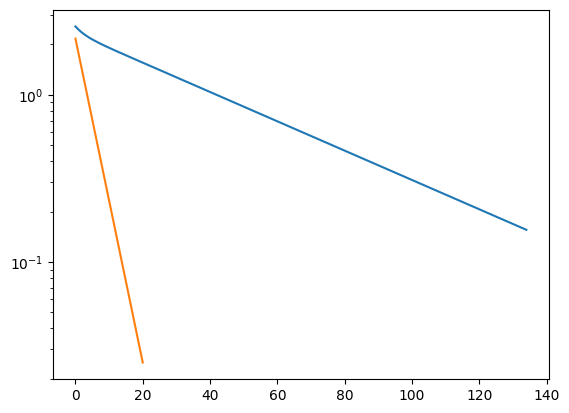

In [11]:
def GD(f, learning_rate, tol):
    df_jit = jax.jit(jax.grad(f, argnums=[0, 1]))
    f_jit = jax.jit(f)
    # random initial_guess
    np.random.seed(0)
    x = np.random.randn(2)
    x_old = x.copy()
    max_iter = 200
    E_history = list()

    for i in range(max_iter):
        grad = np.array(df_jit(x[0], x[1]))
        x -= learning_rate * grad
        E = np.abs(f_jit(x[0], x[1]) - f_jit(x_old[0], x_old[1]))
        error = np.linalg.norm(x - min)
        E_history.append(error)
        if E < tol:
            break
        x_old = x.copy()

    print("tot_iter: %d" % i)
    return x, E_history


tol = 1.0e-3

learning_rate1 = 0.01
x_min1, hst1 = GD(f, learning_rate1, tol)
print("Learning rate %1.2f" % learning_rate1)
print(x_min1)

learning_rate2 = 0.1
x_min2, hst2 = GD(f, learning_rate2, tol)
print("Learning rate %1.1f" % learning_rate2)
print(x_min2)

print(f(x_min2[0], x_min2[1]))

plt.semilogy(hst1)
plt.semilogy(hst2)

As we can see the method converges faster with a higher learning rate, and a little bit slowly with a smaller learning rate. However a high learning rate is not always ideal since it may cause the method to diverge due to bigger steps in updating the approximate solution of the problem.

GD with momentum

tot_iter: 73
Learning rate 0.01, momentum coefficient 0.5
[1.07480008 2.92519998]
tot_iter: 13
Learning rate 0.1, momentum coefficient 0.5
[0.99851426 2.98530006]
tot_iter: 64
Learning rate 0.01, momentum coefficient 0.9
[0.99520814 3.06417679]
tot_iter: 58
Learning rate 0.1, momentum coefficient 0.9
[0.99755277 3.07852106]
0.029320451738178998


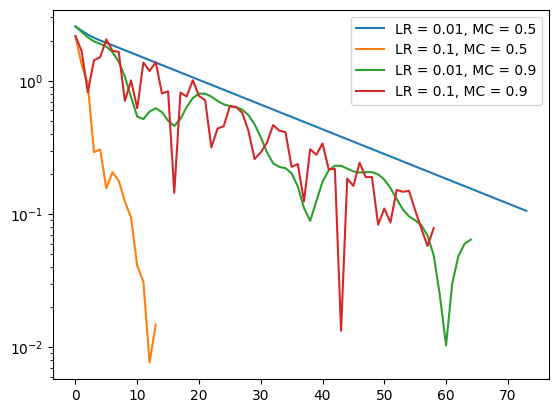

In [15]:
def GDM(f, learning_rate, momentum_coeff, tol):
    df_jit = jax.jit(jax.grad(f, argnums=[0, 1]))
    f_jit = jax.jit(f)
    # random initial_guess
    np.random.seed(0)
    x = np.random.randn(2)
    x_old = x.copy()
    max_iter = 200
    E_history = list()

    momentum = np.zeros(x.shape)
    for i in range(max_iter):
        grad = np.array(df_jit(x[0], x[1]))
        momentum = momentum * momentum_coeff + grad
        x -= learning_rate * momentum
        E = np.abs(f_jit(x[0], x[1]) - f_jit(x_old[0], x_old[1]))
        error = np.linalg.norm(x - min)
        E_history.append(error)
        if E < tol:
            break
        x_old = x.copy()

    print("tot_iter: %d" % i)
    return x, E_history


tol = 1.0e-3

learning_rate1 = 0.01
momentum_coefficient1 = 0.5
x_min1, hst1 = GDM(f, learning_rate1, momentum_coefficient1, tol)
print(
    "Learning rate %1.2f, momentum coefficient %1.1f"
    % (learning_rate1, momentum_coefficient1)
)
print(x_min1)

learning_rate2 = 0.1
momentum_coefficient2 = 0.5
x_min2, hst2 = GDM(f, learning_rate2, momentum_coefficient2, tol)
print(
    "Learning rate %1.1f, momentum coefficient %1.1f"
    % (learning_rate2, momentum_coefficient2)
)
print(x_min2)

learning_rate3 = 0.01
momentum_coefficient3 = 0.9
x_min3, hst3 = GDM(f, learning_rate3, momentum_coefficient3, tol)
print(
    "Learning rate %1.2f, momentum coefficient %1.1f"
    % (learning_rate3, momentum_coefficient3)
)
print(x_min3)

learning_rate4 = 0.1
momentum_coefficient4 = 0.9
x_min4, hst4 = GDM(f, learning_rate4, momentum_coefficient4, tol)
print(
    "Learning rate %1.1f, momentum coefficient %1.1f"
    % (learning_rate4, momentum_coefficient4)
)
print(x_min4)

print(f(x_min4[0], x_min4[1]))

plt.semilogy(hst1, label="LR = 0.01, MC = 0.5")
plt.semilogy(hst2, label="LR = 0.1, MC = 0.5")
plt.semilogy(hst3, label="LR = 0.01, MC = 0.9")
plt.semilogy(hst4, label="LR = 0.1, MC = 0.9")
plt.legend()

Adding a momentum to the method makes it converge faster, in general, but adds some "instabilities" in the convergence history, due to giving to the history of the gradient a bigger or smaller importance in the computation of the updated approximate solution.